In [1]:
# Let's first import our libraries!


import requests
import pandas as pd
import numpy as np
import random

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

from IPython.display import Image 
from IPython.core.display import HTML 

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [2]:
address = 'Cairo, Egypt'

geolocator = Nominatim(user_agent="herewegomaps_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [3]:
search_query = "Mcdonald's"
LIMIT = 30
radius = 500

In [4]:
api_code = "8SxWl6Hk5TVqJefnI94Arty8bRTh7DoBmQe5fFjSdUU" #do you really wanna see it?

In [5]:
url = 'https://discover.search.hereapi.com/v1/discover?at={},{}&q={}&limit={}&lang=en-US&apiKey={}'.format(latitude, longitude, search_query, LIMIT, api_code)
url

"https://discover.search.hereapi.com/v1/discover?at=30.048819,31.243666&q=Mcdonald's&limit=30&lang=en-US&apiKey=8SxWl6Hk5TVqJefnI94Arty8bRTh7DoBmQe5fFjSdUU"

In [6]:
results = requests.get(url).json()

In [7]:
# get the data
venues = results['items']

# tranform it into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,title,id,ontologyId,resultType,access,distance,categories,chains,references,foodTypes,...,address.label,address.countryCode,address.countryName,address.county,address.city,address.district,address.street,position.lat,position.lng,address.houseNumber
0,McDonald's,here:pds:place:818stq4y-3594e104ad3d44e4971515...,here:cm:ontology:mcdonalds,place,"[{'lat': 30.04984, 'lng': 31.24238}]",170,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '1566'}],"[{'supplier': {'id': 'core'}, 'id': '101776449...","[{'id': '800-067', 'name': 'Burgers', 'primary...",...,"McDonald's, Sherif Basha Street, Cairo, Cairo,...",EGY,Egypt,Cairo,Cairo,Abdeen,Sherif Basha Street,30.04984,31.24235,NaN
1,McDonald's,here:pds:place:818stq4y-3b489f799c9d4c30870cc7...,here:cm:ontology:mcdonalds,place,"[{'lat': 30.05179, 'lng': 31.24133}]",425,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '1566'}],"[{'supplier': {'id': 'core'}, 'id': '101775975...","[{'id': '800-067', 'name': 'Burgers', 'primary...",...,"McDonald's, Talaat Harb Street, Cairo, Cairo, ...",EGY,Egypt,Cairo,Cairo,Kaser El Nile,Talaat Harb Street,30.05193,31.24110,NaN
2,McDonald's,here:pds:place:818stq4y-8130d9dd862a4889bafc35...,here:cm:ontology:mcdonalds,place,"[{'lat': 30.04374, 'lng': 31.23709}]",848,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '1566'}],"[{'supplier': {'id': 'core'}, 'id': '120289753...","[{'id': '800-067', 'name': 'Burgers', 'primary...",...,"McDonald's, El Amir Qadadar Street, Cairo, Cai...",EGY,Egypt,Cairo,Cairo,Abdeen,El Amir Qadadar Street,30.04374,31.23710,NaN
3,McDonald's,here:pds:place:818stq4y-44f56c76a0004600a4847f...,here:cm:ontology:mcdonalds,place,"[{'lat': 30.05085, 'lng': 31.23226}]",1106,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '1566'}],"[{'supplier': {'id': 'core'}, 'id': '101777401...","[{'id': '800-067', 'name': 'Burgers', 'primary...",...,"McDonald's, Sahel El Ghelal Street, Cairo, Cai...",EGY,Egypt,Cairo,Cairo,Boulak,Sahel El Ghelal Street,30.05069,31.23238,NaN
4,McDonald's,here:pds:place:818jx7ps-510eb3efa3040d1db6d3b0...,here:cm:ontology:mcdonalds,place,"[{'lat': 30.053, 'lng': 31.22408}]",1945,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '1566'}],"[{'supplier': {'id': 'core'}, 'id': '106935660...","[{'id': '800-067', 'name': 'Burgers', 'primary...",...,"McDonald's, El Jazeera Street, Cairo, Cairo, E...",EGY,Egypt,Cairo,Cairo,El Zamalek,El Jazeera Street,30.05300,31.22405,NaN


In [8]:
# keep only columns that include names, categories, it's lat and lng, and anything else that is associated with location
filtered_columns = ['title', 'categories', "position.lat", "position.lng"] + [col for col in dataframe.columns if col.startswith('address.')] + ['id']
dataframe_filtered_donald = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_donald['categories'] = dataframe_filtered_donald.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_donald.columns = [column.split('.')[-1] for column in dataframe_filtered_donald.columns]

dataframe_filtered_donald.head()

,title,categories,lat,lng,label,countryCode,countryName,county,city,district,street,houseNumber,id
0,McDonald's,Fast Food,30.04984,31.24235,"McDonald's, Sherif Basha Street, Cairo, Cairo,...",EGY,Egypt,Cairo,Cairo,Abdeen,Sherif Basha Street,NaN,here:pds:place:818stq4y-3594e104ad3d44e4971515...
1,McDonald's,Fast Food,30.05193,31.24110,"McDonald's, Talaat Harb Street, Cairo, Cairo, ...",EGY,Egypt,Cairo,Cairo,Kaser El Nile,Talaat Harb Street,NaN,here:pds:place:818stq4y-3b489f799c9d4c30870cc7...
2,McDonald's,Fast Food,30.04374,31.23710,"McDonald's, El Amir Qadadar Street, Cairo, Cai...",EGY,Egypt,Cairo,Cairo,Abdeen,El Amir Qadadar Street,NaN,here:pds:place:818stq4y-8130d9dd862a4889bafc35...
3,McDonald's,Fast Food,30.05069,31.23238,"McDonald's, Sahel El Ghelal Street, Cairo, Cai...",EGY,Egypt,Cairo,Cairo,Boulak,Sahel El Ghelal Street,NaN,here:pds:place:818stq4y-44f56c76a0004600a4847f...
4,McDonald's,Fast Food,30.05300,31.22405,"McDonald's, El Jazeera Street, Cairo, Cairo, E...",EGY,Egypt,Cairo,Cairo,El Zamalek,El Jazeera Street,NaN,here:pds:place:818jx7ps-510eb3efa3040d1db6d3b0...


___
# Lets plot how man branches in every city! <h3>(Mcdonald's)</h3>

In [9]:
#Let's first slice the data and get how much the word repeated to get it's count to plot them!
dfplot = pd.DataFrame(dataframe_filtered_donald.pivot_table(index=['district'], aggfunc='size'))
dfplot.reset_index(inplace=True)
dfplot.columns = ['City', 'Count']
dfplot.head()

,City,Count
0,Abdeen,2
1,Aola El Haram,1
2,Boulak,2
3,El Bsateen,1
4,El Dokki,2


<AxesSubplot:ylabel='City'>

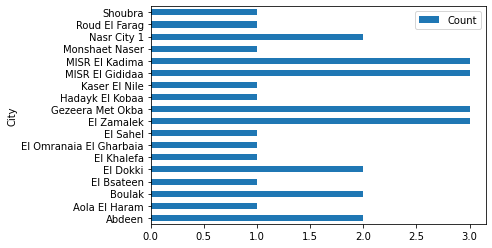

In [10]:
#Now let's plot!
dfplot.plot(x= "City", y= "Count", kind = "barh")

<AxesSubplot:xlabel='City'>

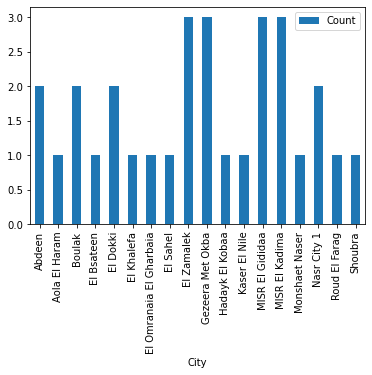

In [11]:
dfplot.plot(x= "City", y= "Count", kind = "bar")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='City'>

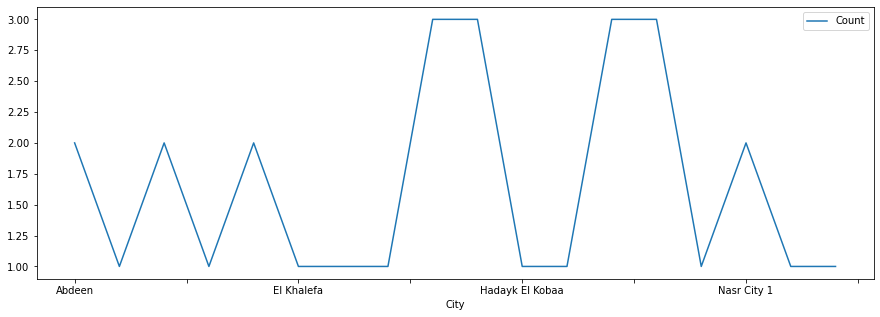

In [12]:
dfplot.plot(x= "City", y= "Count", kind = "line", figsize=(15, 5))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='City'>

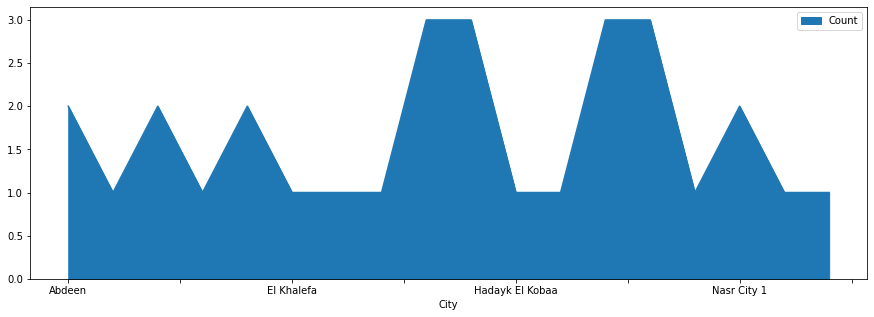

In [13]:
dfplot.plot(x= "City", y= "Count", kind = "area", figsize=(15, 5))

In [14]:
venues_map_donald = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel


for lat, lng, label in zip(dataframe_filtered_donald.lat, dataframe_filtered_donald.lng, dataframe_filtered_donald.district):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup="McDonalds, " + label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map_donald)

print("Go to https://i.imgur.com/UAr44Oy.png if you cant see it!")
# display map
venues_map_donald

Go to https://i.imgur.com/UAr44Oy.png if you cant see it!


___
### Now i want to see where are the "others" to avoid fighting with other shops
#### so let's map KFC as example!

In [15]:
search_query = "KFC"
LIMIT = 30
radius = 500

api_code = "8SxWl6Hk5TVqJefnI94Arty8bRTh7DoBmQe5fFjSdUU"

url = 'https://discover.search.hereapi.com/v1/discover?at={},{}&q={}&limit={}&lang=en-US&apiKey={}'.format(latitude, longitude, search_query, LIMIT, api_code)

results = requests.get(url).json()

venues = results['items']
dataframe = json_normalize(venues)
dataframe.head()

filtered_columns = ['title', 'categories', "position.lat", "position.lng"] + [col for col in dataframe.columns if col.startswith('address.')] + ['id']
dataframe_filtered_KFC = dataframe.loc[:, filtered_columns]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':


In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered_KFC['categories'] = dataframe_filtered_KFC.apply(get_category_type, axis=1)

dataframe_filtered_KFC.columns = [column.split('.')[-1] for column in dataframe_filtered_KFC.columns]

dataframe_filtered_KFC.head()

,title,categories,lat,lng,label,countryCode,countryName,county,city,district,street,houseNumber,id
0,KFC,Restaurant,30.04995,31.24149,"KFC, Abd El Khaleq Tharwat Street, Cairo, Cair...",EGY,Egypt,Cairo,Cairo,Abdeen,Abd El Khaleq Tharwat Street,NaN,here:pds:place:818stq4y-82dd2ae285d54f9094d874...
1,KFC,Restaurant,30.05016,31.24013,"KFC, Talaat Harb Street, Cairo, Cairo, Egypt",EGY,Egypt,Cairo,Cairo,Kaser El Nile,Talaat Harb Street,NaN,here:pds:place:818stq4y-e2d3773c8e13495da8ce25...
2,KFC,Restaurant,30.04741,31.24759,"KFC, Roshdy Basha Street, Cairo, Cairo, Egypt",EGY,Egypt,Cairo,Cairo,El Mosky,Roshdy Basha Street,NaN,here:pds:place:818stq4z-4fa7412efb1b4ef6b0041c...
3,KFC,Fast Food,30.05187,31.24619,"KFC, 26 July Street, Cairo, Cairo, Egypt",EGY,Egypt,Cairo,Cairo,Abdeen,26 July Street,NaN,here:pds:place:818stq4z-7a985389eb6749ca960008...
4,KFC,Restaurant,30.04508,31.23621,"KFC, Meret Basha Street, Cairo, Cairo, Egypt",EGY,Egypt,Cairo,Cairo,Kaser El Nile,Meret Basha Street,NaN,here:pds:place:818stq4y-71cf5a2ddc72479a92ddc4...


___
# Lets plot how many branches in each city! <h3>(KFC)</h3>

In [17]:
#same as above!
dfplot2 = pd.DataFrame(dataframe_filtered_KFC.pivot_table(index=['district'], aggfunc='size'))
dfplot2.reset_index(inplace=True)
dfplot2.columns = ['City', 'Count']
dfplot2.head()

,City,Count
0,Abdeen,3
1,Aola,1
2,El Dokki,2
3,El Hwaitaia,2
4,El Khalefa,3


<AxesSubplot:ylabel='City'>

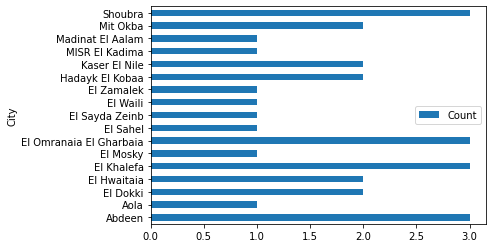

In [18]:
dfplot2.plot(x= "City", y= "Count", kind = "barh")

<AxesSubplot:xlabel='City'>

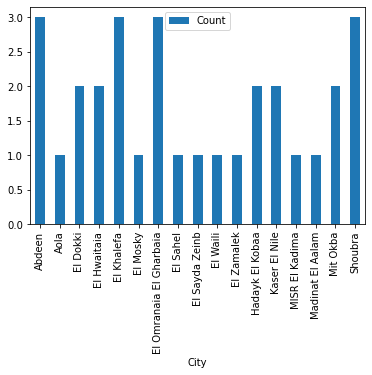

In [19]:
dfplot2.plot(x= "City", y= "Count", kind = "bar")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='City'>

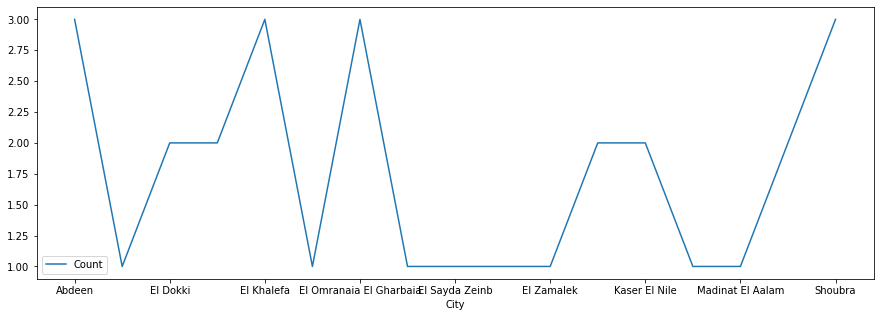

In [20]:
dfplot2.plot(x= "City", y= "Count", kind = "line", figsize=(15, 5))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='City'>

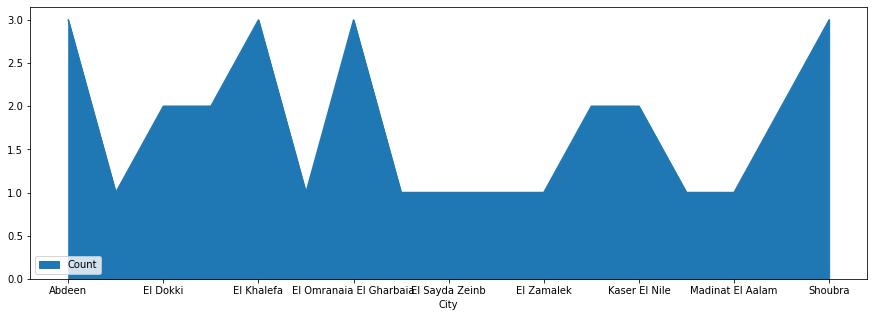

In [21]:
dfplot2.plot(x= "City", y= "Count", kind = "area", figsize=(15, 5))

In [22]:
venues_map_KFC = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

for lat, lng, label in zip(dataframe_filtered_KFC.lat, dataframe_filtered_KFC.lng, dataframe_filtered_KFC.district):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup="KFC, " + label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map_KFC)

print("Go to https://i.imgur.com/LH7YDSL.png if you cant see it!")
# display map
venues_map_KFC

Go to https://i.imgur.com/LH7YDSL.png if you cant see it!


___
# Lets plot both of them and see the differences

In [23]:
#Let's first extract the repeated cities only!
empty = []
for i in dfplot["City"]:
    for y in dfplot2["City"]:
        if i == y:
            empty.append(y)

In [24]:
# add the cities from the list "empty"
dummydf = pd.DataFrame(empty)

# dummydf.reset_index(inplace=True)

#Let's rename the columns
dummydf.columns = ['City']
#Let's get their counts to plot them!
dummydf["Count_MCD"] = dfplot["Count"]
dummydf["Count_KFC"] = dfplot2["Count"]

# dummydf["lat_KFC"] = dfplot2["Count"]
# dummydf["lng_KFC"] = dfplot2["Count"]
dummydf

,City,Count_MCD,Count_KFC
0,Abdeen,2,3
1,El Dokki,1,1
2,El Khalefa,2,2
3,El Omranaia El Gharbaia,1,2
4,El Sahel,2,3
5,El Zamalek,1,1
6,Hadayk El Kobaa,1,3
7,Kaser El Nile,1,1
8,MISR El Kadima,3,1
9,Shoubra,3,1


<AxesSubplot:title={'center':'KFC'}, ylabel='City'>

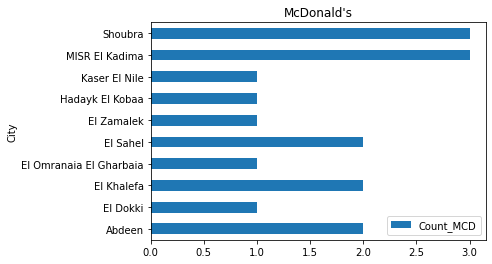

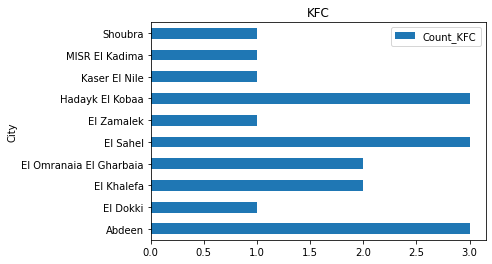

In [25]:
dummydf.plot(x= "City", y= "Count_MCD", kind = "barh", title="McDonald's")
dummydf.plot(x= "City", y= "Count_KFC", kind = "barh", title= "KFC")

<AxesSubplot:title={'center':'KFC'}, xlabel='City'>

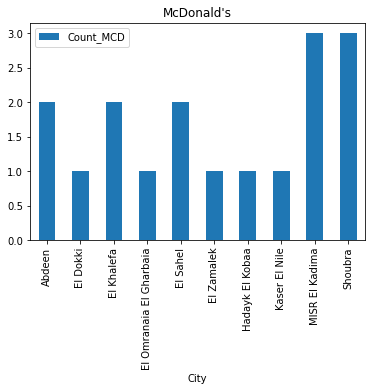

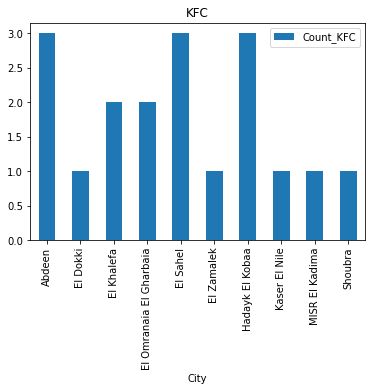

In [26]:
dummydf.plot(x= "City", y= "Count_MCD", kind = "bar", title="McDonald's")
dummydf.plot(x= "City", y= "Count_KFC", kind = "bar", title= "KFC")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'KFC'}, xlabel='City'>

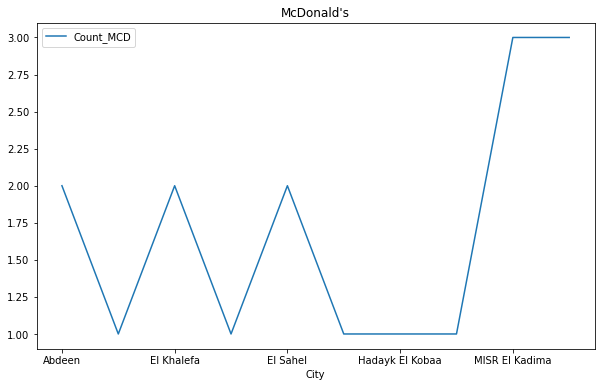

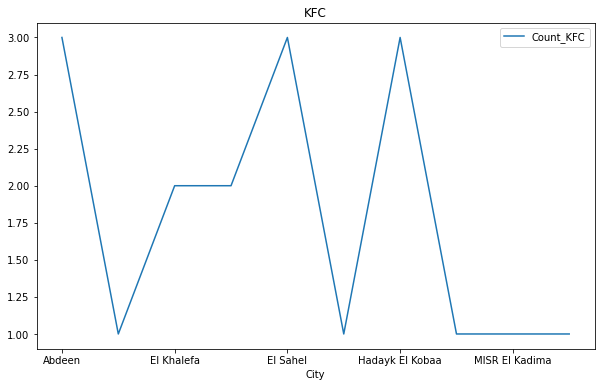

In [27]:
dummydf.plot(x= "City", y= "Count_MCD", kind = "line", title="McDonald's", figsize=(10,6))
dummydf.plot(x= "City", y= "Count_KFC", kind = "line", title= "KFC", figsize=(10,6))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'KFC'}, xlabel='City'>

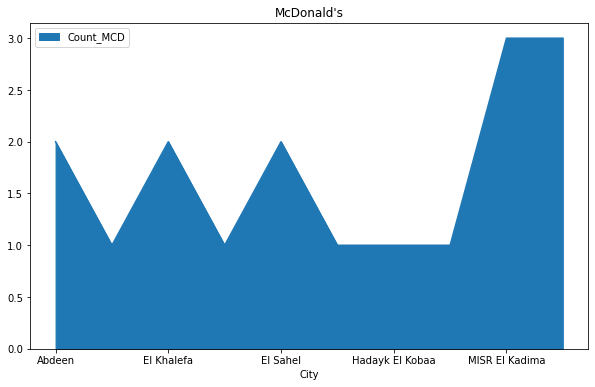

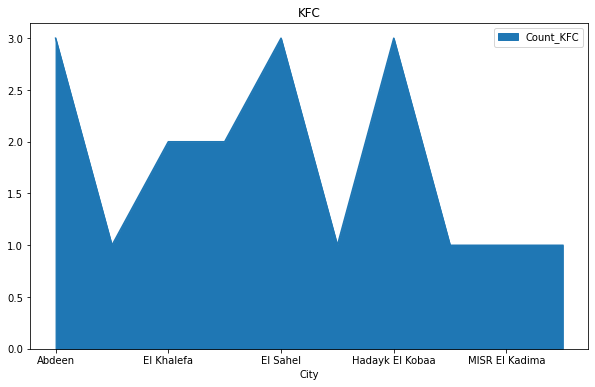

In [28]:
dummydf.plot(x= "City", y= "Count_MCD", kind = "area", title="McDonald's", figsize=(10,6))
dummydf.plot(x= "City", y= "Count_KFC", kind = "area", title= "KFC", figsize=(10,6))

In [29]:
#The same, we are going to get the matched citites and this time its lat and lng too to plot on the map
mcd = []
mcd_lat = []
mcd_lng = []
for i, lat, lng in zip(dataframe_filtered_donald.district, dataframe_filtered_donald.lat, dataframe_filtered_donald.lng):
    for y in dummydf["City"]:
        if i == y:
            mcd.append(y)
            mcd_lat.append(lat)
            mcd_lng.append(lng)
            
            
kfc = []
kfc_lat = []
kfc_lng = []
for i, lat, lng in zip(dataframe_filtered_KFC["district"], dataframe_filtered_KFC["lat"], dataframe_filtered_KFC["lng"]):
    for y in dummydf["City"]:
        if i == y:
            kfc.append(y)
            kfc_lat.append(lat)
            kfc_lng.append(lng)


In [30]:
#Same as above, except we are adding the lat and lng for the map plot
dummy_MCD = pd.DataFrame(mcd)
#dummy_MCD.reset_index(inplace=True)
dummy_MCD.columns = ['City']
dummy_MCD["lat"] = mcd_lat
dummy_MCD["lng"] = mcd_lng


dummy_KFC = pd.DataFrame(kfc)
#dummy_KFC.reset_index(inplace=True)
dummy_KFC.columns = ['City']
dummy_KFC["lat"] = kfc_lat
dummy_KFC["lng"] = kfc_lng

In [31]:
dummy_MCD.head()

,City,lat,lng
0,Abdeen,30.04984,31.24235
1,Kaser El Nile,30.05193,31.24110
2,Abdeen,30.04374,31.23710
3,El Zamalek,30.05300,31.22405
4,El Zamalek,30.05991,31.21976


In [32]:
dummy_KFC.head()

,City,lat,lng
0,Abdeen,30.04995,31.24149
1,Kaser El Nile,30.05016,31.24013
2,Abdeen,30.05187,31.24619
3,Kaser El Nile,30.04508,31.23621
4,Abdeen,30.04375,31.23685


In [33]:
#Now let's plot! 

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

for lat, lng, label in zip(dummy_MCD.lat, dummy_MCD.lng, dummy_MCD.City):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup="McDonalds, " + label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)
    

for lat, lng, label in zip(dummy_KFC.lat, dummy_KFC.lng, dummy_KFC.City):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup="KFC, " + label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

print("McDonald's the red ones, KFC the yellow ones")
print("Go to https://i.imgur.com/GxbDDCC.png if you cant see it!")
# display map
venues_map

McDonald's the red ones, KFC the yellow ones
Go to https://i.imgur.com/GxbDDCC.png if you cant see it!


___

# Let's cluster it (depends on it's City)
#### PS: after i did it, it won't add benefit to the data, so ignore it!

In [34]:
empty = []
dfcluser = pd.DataFrame(empty) 
dfcluser["Name"] = dataframe_filtered["title"]
dfcluser["Latitude"] = dataframe_filtered["lat"]
dfcluser["Longitude"] = dataframe_filtered["lng"]
dfcluser["City"] = dataframe_filtered["district"]
dfcluser.head()

NameError: name 'dataframe_filtered' is not defined

In [ ]:
dfcluser.groupby('City').count()

In [ ]:
# one hot encoding
onehot = pd.get_dummies(dfcluser[['City']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Name'] = dataframe_filtered['title'] 
onehot['City'] = dataframe_filtered['district'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]


onehot.head()

In [ ]:
grouped = onehot.groupby('City').mean().reset_index()

In [ ]:
# set number of clusters
kclusters = 3

grouped_clustering = grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
grouped_clustering.insert(0, 'Cluster Labels', kmeans.labels_)

grouped_clustering[["City"]] = onehot[["City"]]
grouped_clustering[["Lat"]] = dfcluser[["Latitude"]]
grouped_clustering[["Lang"]] = dfcluser[["Longitude"]]


In [ ]:
grouped_clustering.head()

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(grouped_clustering['Lat'], grouped_clustering['Lang'], grouped_clustering['City'], grouped_clustering['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
grouped_clustering